# 1. What is Anomaly Detection?

## 1.1 Outlier detection is:
```
To filter out the outlier data, of which the behavior is different from the prediction.

For example, Industrial Manufacturing Anomaly and Cyber Incursions, which are pointed to the minor cases.
```

## 1.2 Types of Outliers

    1) Datapoint Outliers: a minority of datapoints that behave abnormaly
    2) Context Outliers: anomaly within a certain context, e.g. the dramatic temperature changes
    3) Cluster Outliers: anomaly within a certain cluster


## 1.3 Classifications of Anomaly Detection Tasks

    1) supervised: data with labels
    2) unsupervised: data without labels
    3) half-supervised: dataset without outliers

## 1.4 Circumstances of Anomaly Detetion (Only show what I personally focus on)

    1) Errors Detection
    2) IOT Anomaly Detection
    3) Manufacturing Anomaly Detection
    4) Time Series Anomaly Detection
    5) Logs Anomaly Detection

# 2. Typical Methods of Anomaly Detection

## 2.1 Convertional Methods:

### 2.1.1 Methods Based on Stat.
Statistical methods depend on speculation of dataset distribution and hypothesis testing.

经典的统计学模型是高斯分布（正态分布）：N($\mu$,$\sigma$)

例子：

在工业上经常假设数据为正态分布，故3$\sigma$ (0.9973的置信区间)的方法被经常用来识别离群数据点

而数据如果不呈现为正态分布（比如 $\beta$ 分布），percentile(0.125,0.775)被用来识别离群数据点

另外，对于分布情况比较复杂多变的情况，可以尝试使用GMM (Gaussian Mixture Model) 来拟合原分布。

GMM利用多个不同的权重和不同的高斯分布来“逼近”原分布，并且该方法利用EM算法自动计算likelihood最高的系数。

### 2.1.2 Linear Models

PCA: Principle Component Analysis (主成分分析), 目的主要是用来缓解“维度灾难”

1) PCA 构造出了一个新的特征空间并把原始数据映射到这个全新的低维度空间里

2) 用数据协方差为依据对数据进行降维，以保留信息量更大的数据特征

### 2.1.3 Methods Based on Similarity

这类算法往往需要考虑到每一个数据的分布情况，所以这类算法通常计算量大，适用于数据聚合程度高，离群点少的情况。

例如：DBSCAN的时间复杂度为 $O(n^2)$

这类算法可以大致地归为三类：

1. 基于集群（数据簇）地检测，比如DBSCAN

  这种算法利用数据点的临近把数据点个数来把其划归到各个数据簇中，并把不能归类地数据点视作离群点，该方法主要的系数为$\epsilon$ 和distance

  distance 用来寻找某个数据点的临近数据点，距离小于distance的数据点为临近数据点，反之则无视。

  而小于$\epsilon$个临近数据点的数据点不能划归到一个数据簇中

    问题：

    1) 这种方法通用性很差，因为适用于每个dataset的模型往往需要一组特定的参数；但是该组参数往往不能适用于另外的dataset。

    2) 这种数据簇聚类算法主要是为了寻找成簇的数据，而将异常值视作为噪音，所以会抛弃这些无价值的数据。
       所以这种算法比较少用于Anomaly Detection。

    3) 算法的好坏非常依赖于参数的选择，所以调参是重中之重。

2. 基于距离的度量，例如knn算法

    knn算法是很简单的监督算法，其基本思路是对每一个数据点计算其最近的k个相邻近的L0或者L1距离，通过距离的大小来判断它是否为离群点。

    问题：
    
    1) 时间复杂度为 O(n2)
    
    2) 对k参数的选择很敏感
    
    3) 使用全局阈值，所以无法考虑不同密度区域的dataset。

3. 基于密度的算法， 例如 LOF (局部离群因子)算法

    局部离群因子（LOF）算法和knn很类似，不过LOF利用其临近的局部密度而非距离来度量。一个数据点的领域密度远低于其邻居则为异常值。
    
    该算法能够很好地处理密度不同的区域

    问题：
    
    对参数很敏感

## 2.2 Bagging Methods

Bagging 通常利用多个弱的基检查器来组合成一个强的检查器。其基本思想是，一些算法对于数据集的某些子集有很强的表现，但是对于其他子集的表现不是很理想；所以我们可以把这些检查器组合起来，把每个检查器的输出结合起来。结果会使输出更加robust。

常用的 bagging 方法为：Feature bagging 和 Isolation Forest

**Feature bagging** 往往把数据集分成多个子集（依据feature），并用在每个子训练集上训练LOF的模型。最后的结果徐国需要平均每个模型的输出。

**Isolation Forest** 也是依据类似的思想来做bagging：

    1) Isolation tree (itree) 依据在特征空间切割数据点的次数来为每个数据点计算其 exponential standarized score。

    2) 为了加快运行效率，每个itree的模型为 hierarchical binary tree。

    3) 把训练数据集分成多个子集，并为每一个子集训练出一个单独的itree。

    4) 测试数据集的每个数据点需要计算每个itree的分数。

    4) 最后的输出需要平均所有itree的分数。
    
Isolation Forest 的时间复杂度是 $O(n)$, 所以适用于大数据集，而且其也适用于高纬度的数据。

唯一的问题是，它的score只能用作reference，不能够直接评判每个数据的离群程度。

## 2.3 机器学习方法 (不太熟悉)

数据集有标签的话，可以使用gbdt和xgboost方法来进行分类。

缺点：实际情况经常是unbalanced dataset

优点： 机器学习方法可以构造不同的特征

# 3. Anomaly Detection 开源库

1. sklearn: 很常用，包含DBSCAN，KNN，LOF, Isolation Forest 等等算法

2. PyOD: 专用的异常检测库，速度很快，而且包含最近很火的GAN和各种集成异常检测算法

# 4. 学习 PyOD

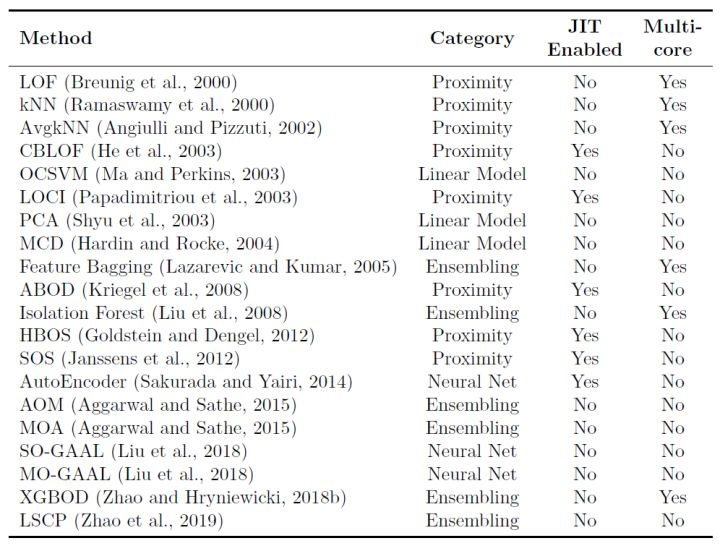

PyOD的使用和sklearn很像，但是方法多很多。

**很期待学习时间序列的异常值检测方法**